<a href="https://colab.research.google.com/github/datasciencechampion/Zero-to-Hero-in-NLP-LLM-GenAI-AGI/blob/main/ChatBot/Customer_Support_Chatbot_using_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Building a Customer Support Chatbot**

This module is part of [Zero-to-Hero in data Science](https://colab.research.google.com/drive/1EGLE0Lnst0CNmkw5BOFGSqIT5oxl5xYW?usp=sharing)

Author : [Pramod Singh](https://www.linkedin.com/in/pramod-singh-4635962/)

# Topic Covered
- What is Chatbot & OrderBot
- How they work
- Building an OrderBot for PizzaHut using OpenAi's **Chat Completion API**

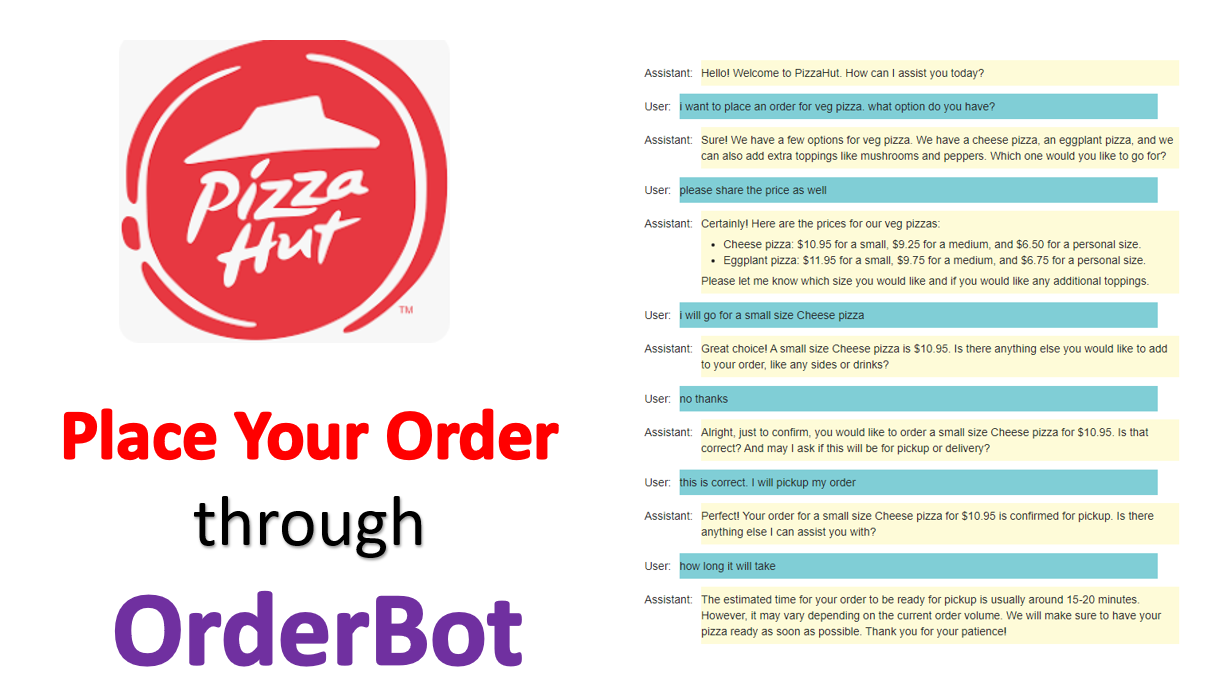

# What is a Chatbot & OrderBot

A chatbot is a computer program or an artificial intelligence (AI) system designed to interact with humans through conversational interfaces, such as messaging apps, websites, or voice assistants. It is programmed to understand and respond to natural language inputs from users in a conversational manner.

Chatbots use various technologies, including natural language processing (NLP), machine learning, and sometimes even neural networks, to analyze and understand the user's input. They then generate appropriate responses based on their programming or by accessing a knowledge base or database of information. The responses can be pre-defined, rule-based, or generated dynamically based on the context and the user's query.

Chatbots are used in a wide range of applications and industries. They can provide customer support, answer frequently asked questions, help with information retrieval, facilitate online transactions, automate tasks, and even provide entertainment. Their purpose is to simulate human-like conversations and provide useful and interactive experiences for users.

**OrderBot** is a type of ChatBot which can accept order based on the provided instruction.

# How ChatBot/OrderBot work?

As shown in the below figure, here's a simplified call flow to illustrate the end to end process:

Pre-defined instructions: Firstly the chatbot is instructed with general information. For example:
- Tone of the chat: This is to guide the chatbot to communicate in polite manner.
- Task specific information: If we are building OrderBot to accept the order for Pizza. Then this bot must be aware about available pizza menus and its cost.

- 1. User Input: The interaction begins when a user sends a message or query to the chatbot. This input can be in the form of text, voice, or any other supported input format. In our OrderBot example we are only supporting text input.

- 2. Welcome Message: This is the fist assistant message sent to the user. It is called welcome message, just to greet the user.

Preprocessing: The chatbot takes the user input and performs some preprocessing tasks. This may include tokenization, removing special characters, lowercasing the text, or any other necessary steps to prepare the input for the language model.

- 3. Model Inference: The preprocessed user input is passed to the language model, such as ChatGPT, for inference. The model is a large neural network that has been trained on a vast amount of text data and can generate responses based on the input it receives.

- 4. Response Generation: The language model processes the user input and generates a response. It considers the context provided by the user's query and tries to generate a coherent and relevant response based on its training.

- 5. Postprocessing: The generated response from the language model may require postprocessing. This step can involve tasks such as removing unwanted tags, correcting grammar or spelling errors, or applying any specific formatting required for the response.

- 6. Bot Output: The postprocessed response is then sent back to the user as the chatbot's reply. This output can be in the form of text, voice, or any other medium that the chatbot supports.

Repeat Steps 1-6: The conversation continues as the user provides further input, and the chatbot repeats the process of preprocessing, model inference, response generation, and postprocessing to generate subsequent replies.

It's important to note that this is a simplified overview of the call flow, and the actual implementation of a chatbot can involve additional complexities such as context tracking, intent recognition, entity extraction, and dialogue management to provide more accurate and context-aware responses.

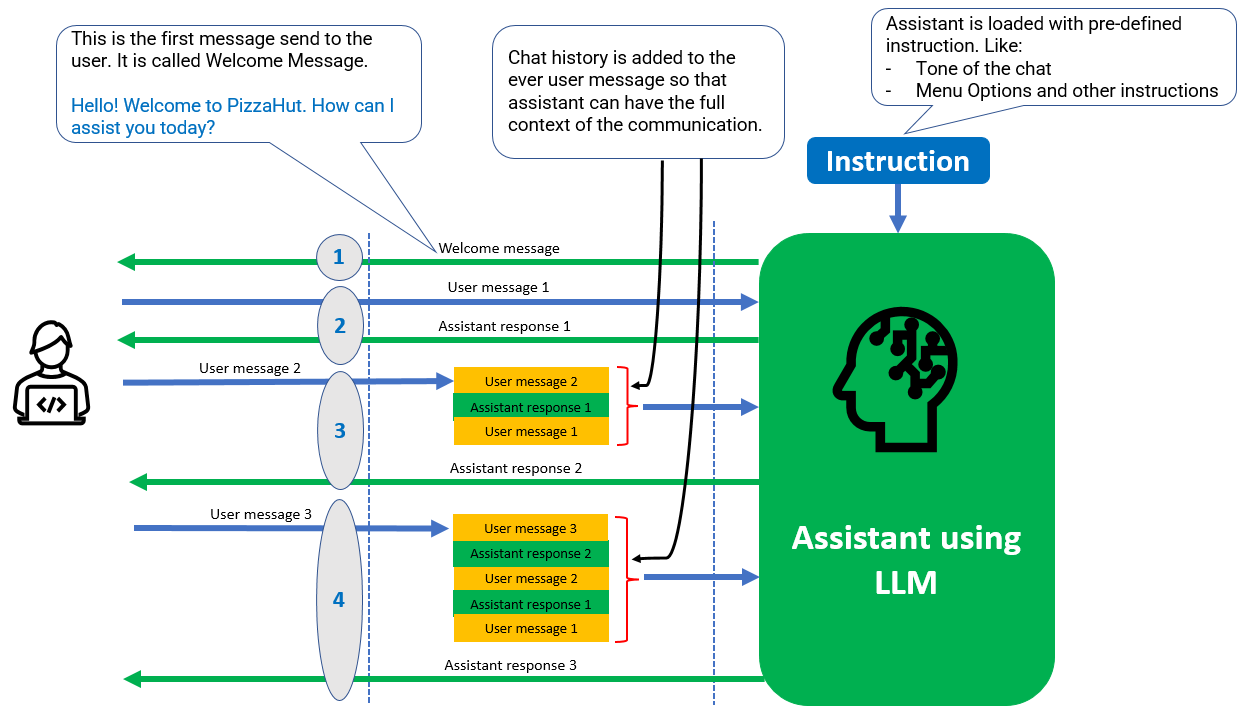

# Setting the environment

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.


In [ ]:
import os
import openai
# Enter your OpenAI API key here:
openai.api_key = ''

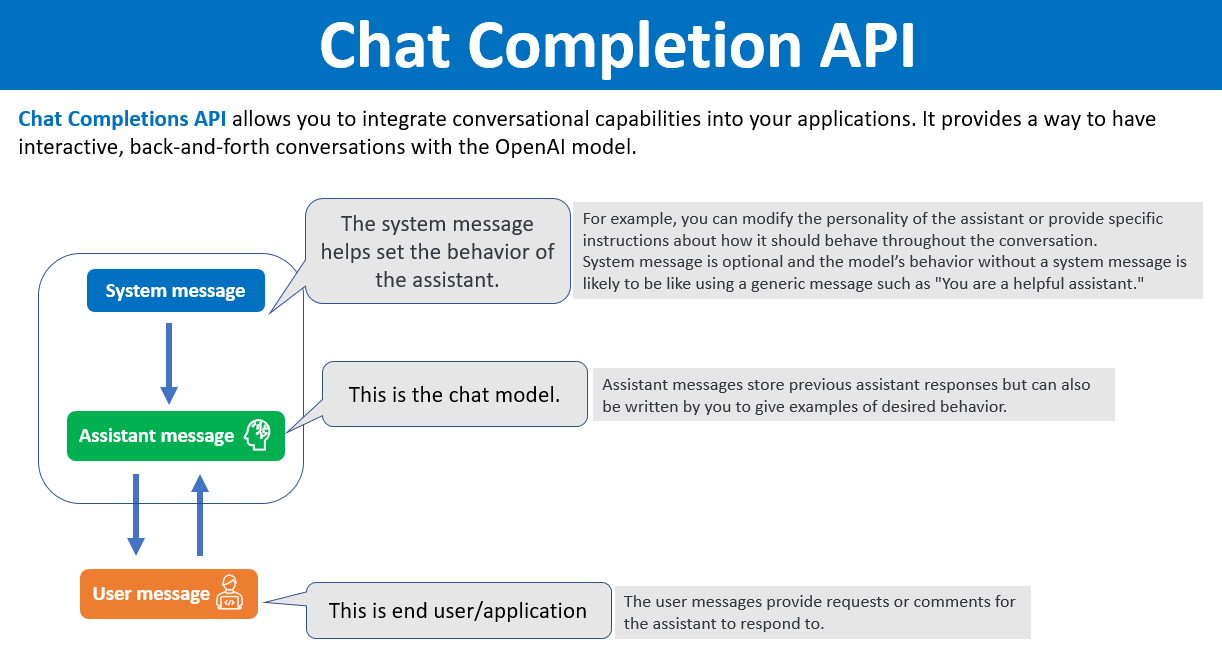

An example API call looks as follows:

Chat models take a list of **messages** as input and return a model-generated message as output. Although the chat format is designed to make multi-turn conversations easy, it’s just as useful for single-turn tasks without any conversation.

    import openai

    openai.ChatCompletion.create(
      model="gpt-3.5-turbo",
      messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": "Who won the world series in 2020?"},
            {"role": "assistant", "content": "The Los Angeles Dodgers won the World Series in 2020."},
            {"role": "user", "content": "Where was it played?"}
        ]
    )

The main input is the **messages parameter**. Messages must be an array of message objects, where each object has a role (either "system", "user", or "assistant") and content. Conversations can be as short as one message or many back and forth turns.

Typically, a conversation is formatted with a **system message** first, followed by alternating **user and assistant messages.**

**The system message helps set the behavior of the assistant.** For example, you can modify the personality of the assistant or provide specific instructions about how it should behave throughout the conversation. However note that the system message is optional and the model’s behavior without a system message is likely to be similar to using a generic message such as "You are a helpful assistant."

The user messages provide requests or comments for the assistant to respond to. Assistant messages store previous assistant responses, but can also be written by you to give examples of desired behavior.

Including conversation history is important when user instructions refer to prior messages. In the example above, the user’s final question of "Where was it played?" only makes sense in the context of the prior messages about the World Series of 2020. Because the models have no memory of past requests, all relevant information must be supplied as part of the conversation history in each request. If a conversation cannot fit within the model’s token limit, it will need to be shortened in some way.

In [ ]:
def get_completion_from_messages(messages, model="gpt-3.5-turbo", temperature=0):
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
#     print(str(response.choices[0].message))
    return response.choices[0].message["content"]

We're going to define a helper function **collect_message**, to collect user messages. This is going to collect prompts from a user interface and then append it to a list called "context", and then it will call the model with that
context every time using already defined another helper function **get_completion_from_message**. And the model response is then also added to the context, so the kind of model message is added to the context, the user message is added to the context, so on, so it just kind of grows longer and longer. This way the model has the information it needs to determine what to do next.

In [ ]:
def collect_messages(_):
    prompt = inp.value_input
    inp.value = ''
    context.append({'role':'user', 'content':f"{prompt}"})
    response = get_completion_from_messages(context)
    context.append({'role':'assistant', 'content':f"{response}"})
    panels.append(
        pn.Row('User:', pn.pane.Markdown(prompt, width=600,style={'background-color': '#80ced6'})))
    panels.append(
        #pn.Row('Assistant:', pn.pane.Markdown(response, width=600, style={'background-color': '#F6F6F6'})))
        pn.Row('Assistant:', pn.pane.Markdown(response, width=600, style={'background-color': '#fefbd8'})))

    return pn.Column(*panels)


In [ ]:
import panel as pn  # GUI
pn.extension()

panels = [] # collect display

context = [ {'role':'system', 'content':"""
You are OrderBot for PizzaHut restaurants, an automated service to collect orders for a pizza. \
You first greet the customer in very polite way, then collects the order, \
and then asks if it's a pickup or delivery. \
You wait to collect the entire order, then summarize it and check for a final \
time if the customer wants to add anything else. \
If it's a home delivery, you ask for an address. \
Finally you collect the payment.\
Make sure to clarify all options, extras and sizes to uniquely \
identify the item from the menu.\
You respond in a short, very conversational friendly style. \
The menu includes \
pepperoni pizza  12.95, 10.00, 7.00 \
cheese pizza   10.95, 9.25, 6.50 \
eggplant pizza   11.95, 9.75, 6.75 \
fries 4.50, 3.50 \
greek salad 7.25 \
Toppings: \
extra cheese 2.00, \
mushrooms 1.50 \
sausage 3.00 \
canadian bacon 3.50 \
AI sauce 1.50 \
peppers 1.00 \
Drinks: \
coke 3.00, 2.00, 1.00 \
sprite 3.00, 2.00, 1.00 \
bottled water 5.00 \
"""} ]  # accumulate messages


inp = pn.widgets.TextInput(value="Hi", placeholder='Enter text here…')
button_conversation = pn.widgets.Button(name="Chat!")

interactive_conversation = pn.bind(collect_messages, button_conversation)

dashboard = pn.Column(
    inp,
    pn.Row(button_conversation),
    pn.panel(interactive_conversation, loading_indicator=True, height=300),

)

dashboard

Column
    [0] TextInput(placeholder='Enter text here…')
    [1] Row
        [0] Button(name='Chat!')
    [2] ParamFunction(function, _pane=Column, height=300, loading_indicator=True)

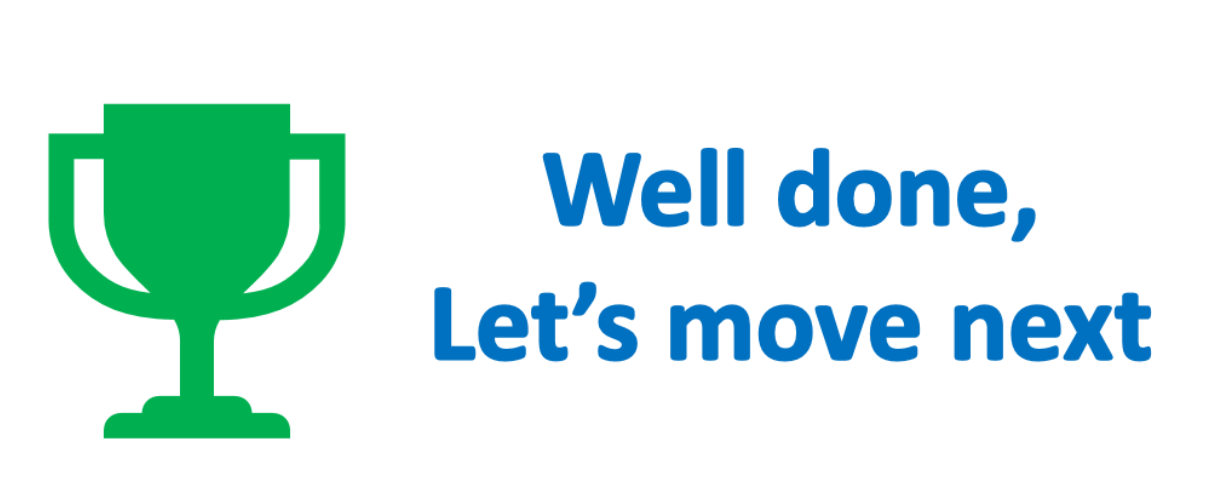